In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [19]:
file_path = "https://raw.githubusercontent.com/avnyadav/sensor-fault-detection/main/aps_failure_training_set1.csv"
df = pd.read_csv(file_path, na_values='na')

In [20]:
def reduce_memory_usage(df):
    """
    Iterates through all columns of a DataFrame and modifies the data type
    to reduce memory usage.
    """
    start_mem = df.memory_usage(deep=True).sum() / 1024**2
    print(f'Initial memory usage of the dataframe: {start_mem:.2f} MB')

    for col in df.columns:
        col_type = df[col].dtype

        # Skip the categorical 'class' column
        if col == 'class':
            continue
            
        # Downcast numerical columns
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()

            # Check for integers
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            
            # Check for floats (most of your sensor data)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64) # Keep as float64 if it's too large for float32

    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    print(f'Memory usage after optimization: {end_mem:.2f} MB')
    print(f'Reduced by: {(100 * (start_mem - end_mem) / start_mem):.2f}%')
    return df

# Apply the function to your DataFrame
df_optimized = reduce_memory_usage(df.copy())

Initial memory usage of the dataframe: 48.73 MB
Memory usage after optimization: 25.26 MB
Reduced by: 48.16%


In [21]:
df = df_optimized

In [22]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,182.0,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN


### Basic Data Understanding

In [23]:
df.shape

(36188, 171)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36188 entries, 0 to 36187
Columns: 171 entries, class to eg_000
dtypes: float32(169), int32(1), object(1)
memory usage: 23.7+ MB


In [25]:
df['class'].value_counts()

class
neg    35188
pos     1000
Name: count, dtype: int64

In [26]:
categorical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
numeric_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 1 numerical features : ['class']

We have 170 categorical features : ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_

# Challenges and Other Objectives

## I. Key Challenges

* Need to handle **many Null values** in **almost all columns**.

---

## II. Project Objectives & Constraints

* **No low-latency requirement** ($\text{high}$ tolerance for prediction time).
* **Interpretability is not important** ($\text{low}$ priority).
* **Misclassification** leads to **unecessary repair costs** ($\text{critical}$ focus on minimizing error types that drive cost).

Plotting missing values

In [27]:
for feature in df.columns:
    percentage_missing = (df[feature].isnull().sum() / len(df)) * 100
    print(f"Percentage of missing values in {feature} is {percentage_missing:.2f}%")

Percentage of missing values in class is 0.00%
Percentage of missing values in aa_000 is 0.00%
Percentage of missing values in ab_000 is 77.09%
Percentage of missing values in ac_000 is 5.92%
Percentage of missing values in ad_000 is 25.42%
Percentage of missing values in ae_000 is 4.39%
Percentage of missing values in af_000 is 4.39%
Percentage of missing values in ag_000 is 1.05%
Percentage of missing values in ag_001 is 1.05%
Percentage of missing values in ag_002 is 1.05%
Percentage of missing values in ag_003 is 1.05%
Percentage of missing values in ag_004 is 1.05%
Percentage of missing values in ag_005 is 1.05%
Percentage of missing values in ag_006 is 1.05%
Percentage of missing values in ag_007 is 1.05%
Percentage of missing values in ag_008 is 1.05%
Percentage of missing values in ag_009 is 1.05%
Percentage of missing values in ah_000 is 1.06%
Percentage of missing values in ai_000 is 1.04%
Percentage of missing values in aj_000 is 1.04%
Percentage of missing values in ak_000 

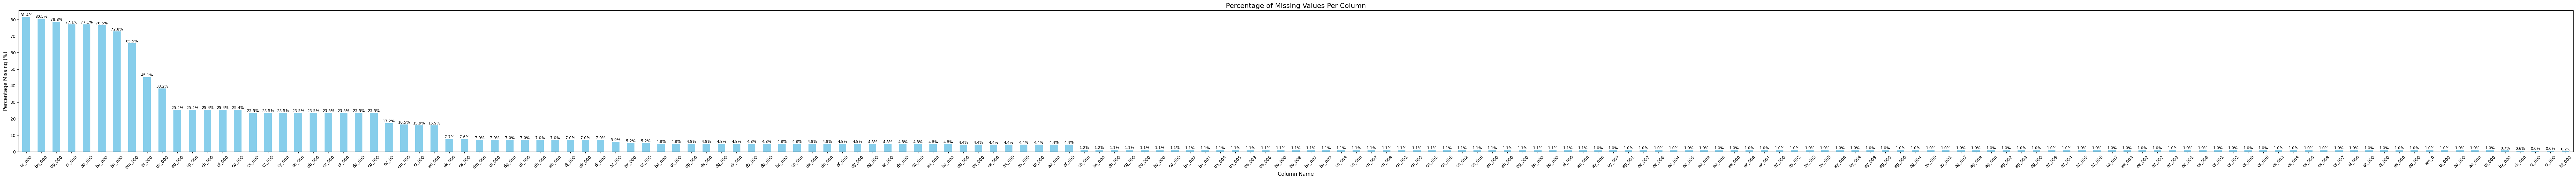

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# The calculation can be done more concisely, and the sorting step
# is placed after the calculation for clarity.

# 1. Calculate the percentage of missing values and sort
missing_percentage = (
    df.isnull().sum() / len(df) * 100
).sort_values(ascending=False)

# 2. Filter out columns with 0% missing values for a cleaner plot
# This is a common and useful improvement.
missing_percentage = missing_percentage[missing_percentage > 0]

# Check if there are any missing values to plot
if not missing_percentage.empty:
    # 3. Setup for Plotting
    # Dynamic figsize based on the number of columns to plot
    num_cols = len(missing_percentage)
    fig_width = max(10, num_cols * 0.5) # Ensure a minimum width, scale with columns

    fig, ax = plt.subplots(figsize=(fig_width, 6))

    # 4. Create Bar Plot
    # Use the index (column names) and values (percentages) directly
    missing_percentage.plot(kind='bar', ax=ax, color='skyblue')

    # 5. Add Plot Enhancements
    ax.set_title('Percentage of Missing Values Per Column', fontsize=16)
    ax.set_ylabel('Percentage Missing (%)', fontsize=12)
    ax.set_xlabel('Column Name', fontsize=12)
    ax.tick_params(axis='x', rotation=45) # Rotate X-labels for better reading

    # Optional: Add the percentage value on top of each bar
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():.1f}%',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            fontsize=9
        )

    plt.tight_layout() # Adjust plot to prevent labels from being cut off
    plt.show()
else:
    print("No missing values found in the DataFrame.")

Dropping Columns which has more than 70% of missing values.

In [29]:
drop_cols = missing_percentage[missing_percentage > 70]
df.drop(list(drop_cols.index), axis=1, inplace=True)

In [30]:
# Check shape of the dataset after dropping columns
df.shape

(36188, 164)

In [ ]:
for feature in df.columns:
    percentage_missing = (df[feature].isnull().sum() / len(df)) * 100
    print(f"Percentage of missing values in {feature} is {percentage_missing:.2f}%")

## Outlier and Skewness Analysis

In [37]:
# Select a sample of features across different categories for analysis
sample_features = ['aa_000', 'ac_000', 'ag_005', 'ay_001', 'co_000', 'ec_00', 'ee_005']

print("\n--- 1. Descriptive Statistics (Selected Features) ---")
# Use the .T (transpose) to make the output readable
stats_df = df[sample_features].describe().T
print(stats_df.to_markdown()) # Use to_markdown for easy posting

print("\n--- 2. Outlier/Skewness Check ---")
# Analyze the difference between Mean and Median (50th percentile) and include Max
stats_analysis_df = stats_df[['mean', '50%', 'max']].copy()
stats_analysis_df['Mean_vs_Median_Difference'] = stats_analysis_df['mean'] - stats_analysis_df['50%']
print(stats_analysis_df.to_markdown())


--- 1. Descriptive Statistics (Selected Features) ---
|        |   count |             mean |              std |   min |     25% |      50% |       75% |              max |
|:-------|--------:|-----------------:|-----------------:|------:|--------:|---------:|----------:|-----------------:|
| aa_000 |   36188 |  65910.2         | 164124           |     0 |   866   |  31026   |  50068.5  |      2.74656e+06 |
| ac_000 |   34047 |      3.53522e+08 |      7.92649e+08 |     0 |    16   |    152   |    964    |      2.13071e+09 |
| ag_005 |   35809 |      1.22588e+06 |      3.55548e+06 |     0 | 14250   | 181342   | 943610    |      7.13279e+07 |
| ay_001 |   35809 |  16290.5         | 687953           |     0 |     0   |      0   |      0    |      8.05254e+07 |
| co_000 |   26988 | 318452           |      5.2254e+07  |     0 |     0   |      8   |     72    |      8.5843e+09  |
| ec_00  |   29979 |   1446.98        |   3892.48        |     0 |   116.4 |    759.1 |   1388.88 | 106020      

### **Key Observations and Implications:**
**1. Extreme Positive Skewness:**

- The **Mean is consistently higher in the magnitude i.e larger than the Median (50% quantile)** across all sample features.

- Example: For co_000, the median is 8, while the mean is over 318,000. This immense difference (≈318,444) is a definitive sign of extreme positive (right) skewness.

- Implication: This distribution shape is problematic for linear models. **Log Transformation** or similar power transformations are mandatory to normalize the data and stabilize variance.

**2. Heavy Outlier Influence:**

- The **max values are astronomically higher compared to the mean and median**. The few extreme sensor readings disproportionately inflate the average.

- Example: The aa_000 maximum value is ≈2.75 million, while 75% of the data is below ≈50,000.

- Implication: The training process will be highly sensitive to these outliers. Data will **need to be scaled** using a robust method (like a RobustScaler or StandardScaler after **transformation**) to ensure stability.

**3. High Zero Concentration:**

- Features like **ay_001 and co_000 have a median of 0 or very low values**.

- Implication: These sensors are **frequently inactive or report no activity**. This will further necessitate robust data **transformation techniques to handle the mass of zero values** before scaling.

# Univariate Analysis

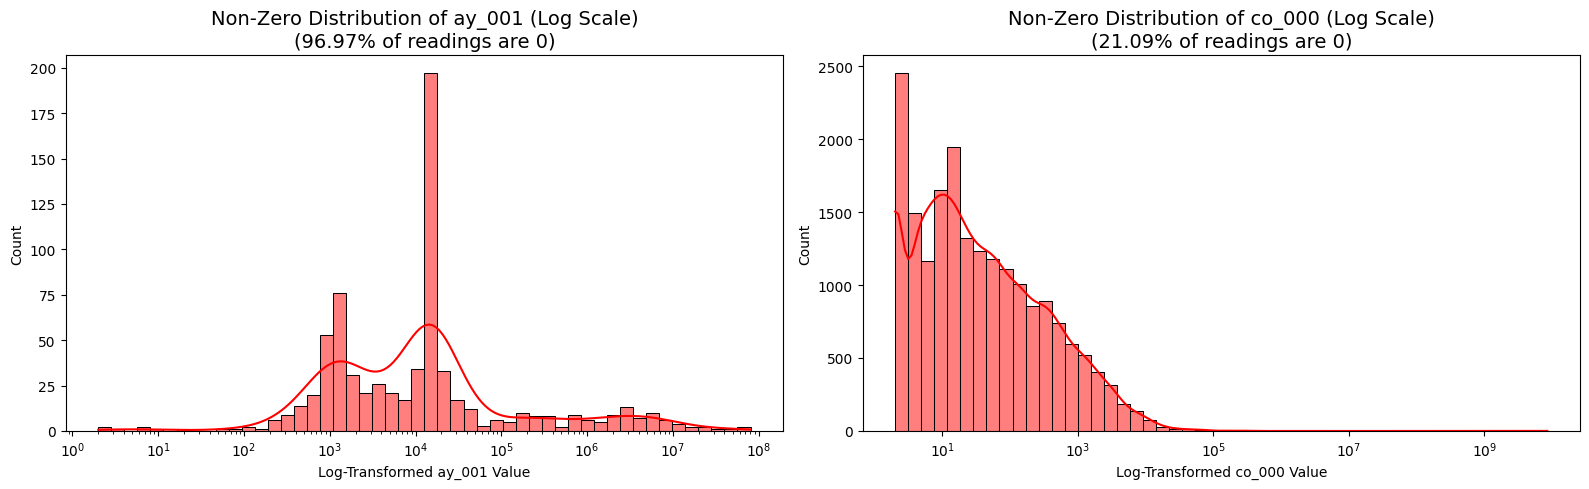

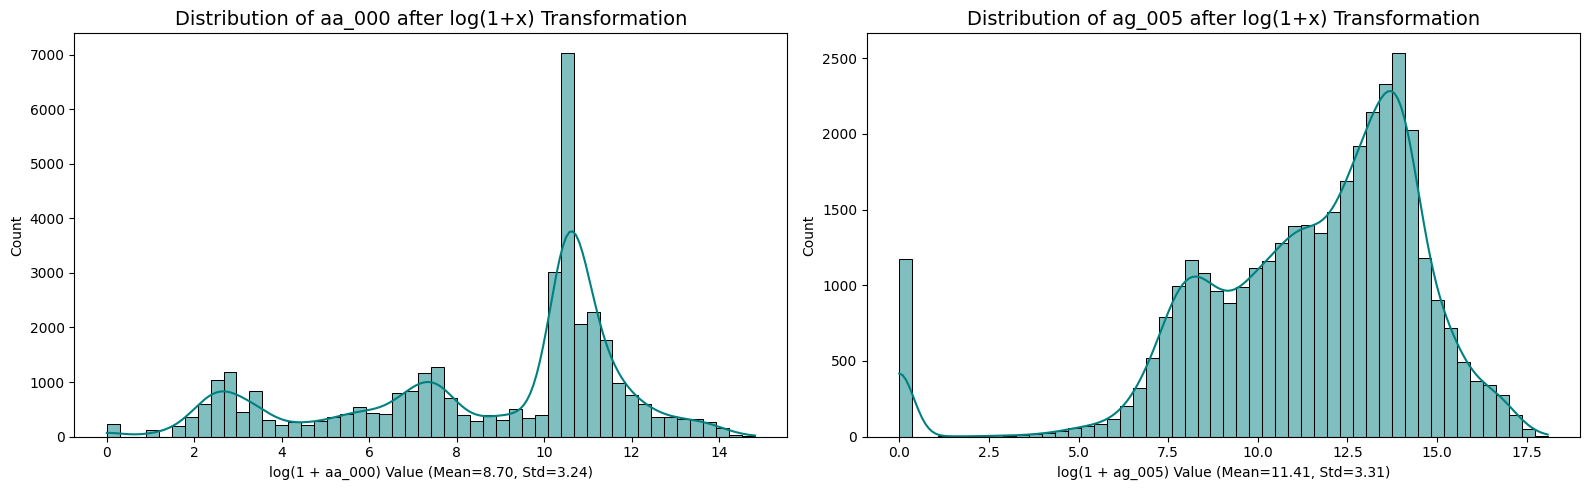

In [40]:
# --- 1. Analyze Zero-Inflated Features (e.g., ay_001, co_000) ---
# These features have a huge spike at zero. We visualize the non-zero distribution
features_zero_inflated = ['ay_001', 'co_000']

plt.figure(figsize=(16, 5))
for i, feature in enumerate(features_zero_inflated):
    # Filter out zeros to see the distribution of the positive readings
    non_zero_data = df[feature].dropna()
    non_zero_data = non_zero_data[non_zero_data > 0]
    
    # Check if there's enough non-zero data to plot
    if len(non_zero_data) > 100:
        plt.subplot(1, 2, i + 1)
        # Use log transformation on the x-axis to handle the massive range/skewness
        sns.histplot(non_zero_data, bins=50, kde=True, log_scale=True, color='red')
        
        # Calculate the percentage of zeros/NaNs
        total_count = len(df)
        zero_count = (df[feature] == 0).sum()
        percent_zero = (zero_count / total_count) * 100
        
        plt.title(f'Non-Zero Distribution of {feature} (Log Scale)\n({percent_zero:.2f}% of readings are 0)', fontsize=14)
        plt.xlabel(f'Log-Transformed {feature} Value')
        plt.ylabel('Count')
    else:
        print(f"Skipping {feature} plot: Not enough non-zero data.")

plt.tight_layout()
plt.show()

# --- 2. Analyze High-Value Continuous Features (e.g., aa_000, ag_005) ---
# These features represent total counts or overall activity.
features_continuous = ['aa_000', 'ag_005']

plt.figure(figsize=(16, 5))
for i, feature in enumerate(features_continuous):
    plt.subplot(1, 2, i + 1)
    
    # We apply log transformation to the data itself for visualization
    # We use np.log1p (log(1+x)) to handle any remaining zero values gracefully
    log_transformed_data = np.log1p(df[feature].dropna())
    
    sns.histplot(log_transformed_data, bins=50, kde=True, color='teal')
    
    # Analyze the transformation success
    mean_val = log_transformed_data.mean()
    std_val = log_transformed_data.std()

    plt.title(f'Distribution of {feature} after log(1+x) Transformation', fontsize=14)
    plt.xlabel(f'log(1 + {feature}) Value (Mean={mean_val:.2f}, Std={std_val:.2f})')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

**1. Imputation Strategy:** Since the features are highly non-normal (multi-modal, zero-inflated), imputing with the median remains the safest and most robust strategy.

**2. Transformation Strategy:** The log(1+x) transformation is highly effective at reducing the scale and skewness and is confirmed as necessary for all numerical features.

**3. Modeling Complexity:** The highly multi-modal nature of features like aa_000 means that non-linear models (like Tree-based models: Random Forest, XGBoost) will likely perform better than linear models, as they can naturally learn decision boundaries around the different modes/peaks.

# Bivariate Analysis

C:\Users\NAMAN VERMA\AppData\Local\Temp\ipykernel_10528\448415729.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['class_encoded'] = df['class'].apply(lambda x: 1 if x == 'pos' else 0)
C:\Users\NAMAN VERMA\AppData\Local\Temp\ipykernel_10528\448415729.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=temp_df, palette='Spectral')
C:\Users\NAMAN VERMA\AppData\Local\Temp\ipykernel_10528\448415729.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same ef

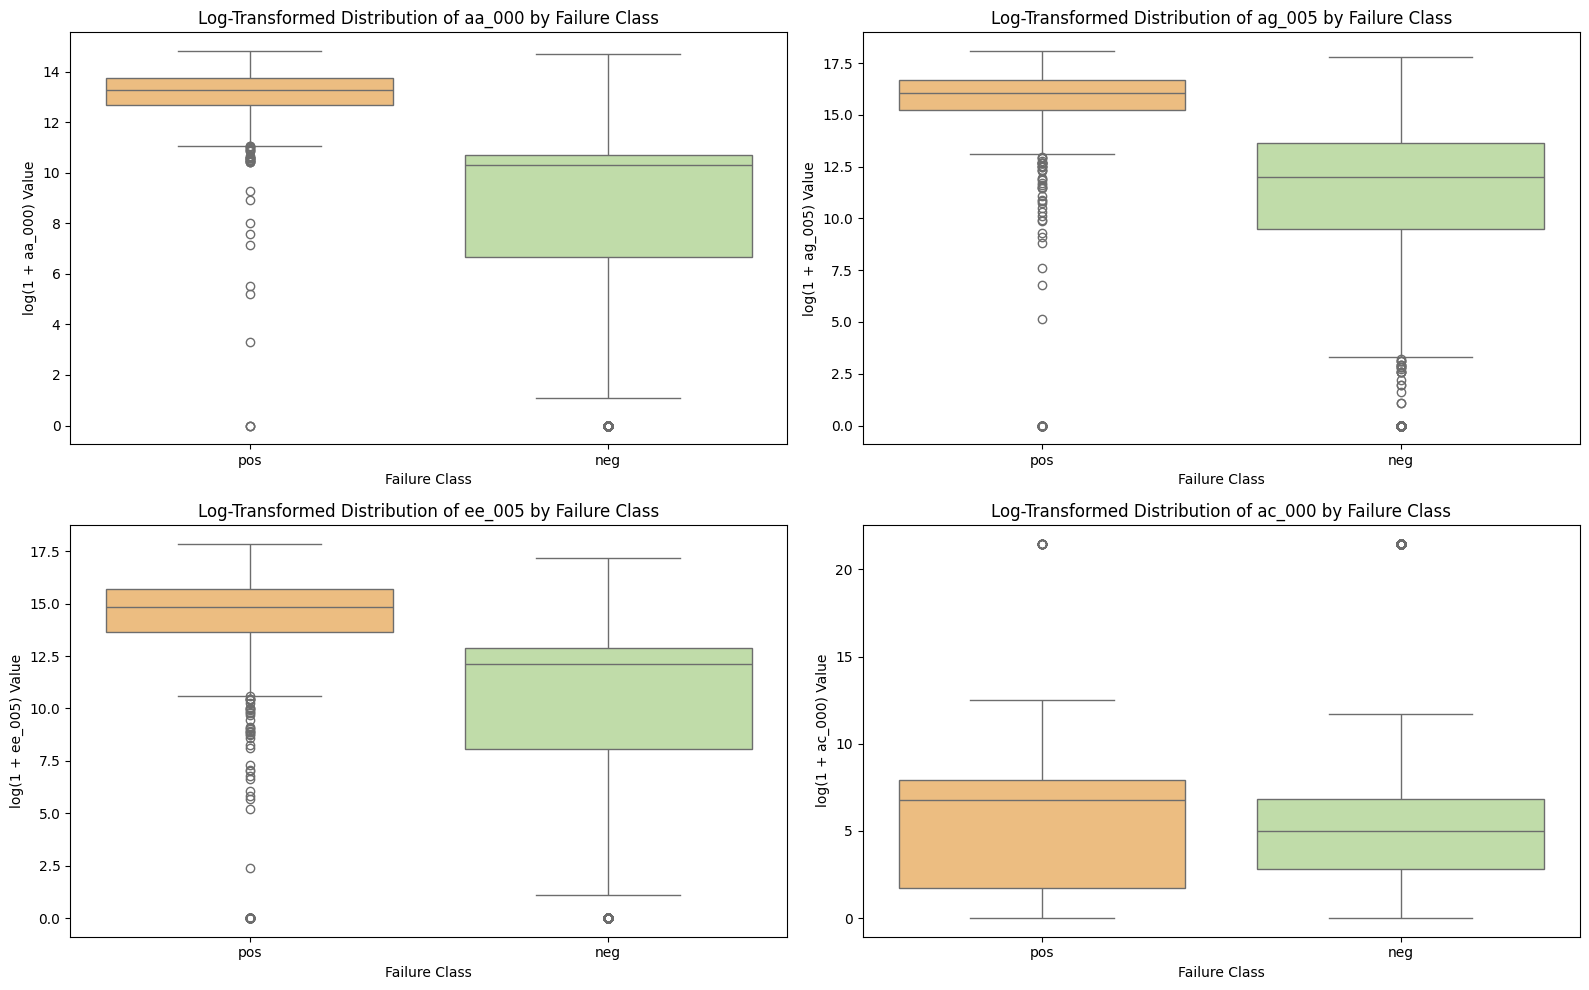

In [42]:
# We will encode 'neg' as 0 and 'pos' as 1. We keep the original 'class' column for the boxplot labels.
df['class_encoded'] = df['class'].apply(lambda x: 1 if x == 'pos' else 0)

# Select 4 high-potential features for comparison
features_to_compare = ['aa_000', 'ag_005', 'ee_005', 'ac_000']

plt.figure(figsize=(16, 10))

for i, feature in enumerate(features_to_compare):
    plt.subplot(2, 2, i + 1)
    
    # Apply log(1+x) transformation to the feature data for visualization only
    temp_df = df[['class', feature]].dropna().copy()
    temp_df[feature] = np.log1p(temp_df[feature])

    # Use a Boxplot to compare the median and IQR by class on the transformed data
    sns.boxplot(x='class', y=feature, data=temp_df, palette='Spectral')
    
    plt.title(f'Log-Transformed Distribution of {feature} by Failure Class', fontsize=12)
    plt.xlabel('Failure Class')
    plt.ylabel(f'log(1 + {feature}) Value')

plt.tight_layout()
plt.show()

**aa_000 (Top Left), ag_005 (Top Right) , ee_005 (Bottom Left):**

- Median: The median for the pos (failure) class is at approximately distinctly higher, while the median for the neg (non-failure) class is lower

- Separation: The pos distribution is almost entirely above the neg distribution. The box (IQR) of the pos class barely overlaps with the box of the neg class.

- Conclusion: This is the strongest individual predictor. Higher readings are definitively associated with failure.

**ac_000 (Bottom Right):**

- Median: The medians for both classes are tightly clustered around 7.

- Separation: The medians overlap heavily, and the boxes show significant intersection.

- Conclusion: This feature is less useful for linear separation of the median, though its extreme upper outliers might still contribute some predictive power.

**NOTE:**
- In a high-dimensional dataset like this (with 164 features), the goal of early-stage EDA is to strategically select a representative sample to uncover patterns that likely apply to the whole dataset.
- ee_005, a highly reliable sensor from the distinct ee_ group (low missing values), was included to test if the higher reading = failure predictive pattern held true across sensor families. It confirmed this pattern.

# Correlation Analysis (Final EDA Step)

1. Imputing remaining NaN values with the Median...


C:\Users\NAMAN VERMA\AppData\Local\Temp\ipykernel_10528\2001200596.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final[col].fillna(median_value, inplace=True)
C:\Users\NAMAN VERMA\AppData\Local\Temp\ipykernel_10528\2001200596.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

   Total missing values after imputation: 0

2. Identifying High Correlation (r > 0.95) in first 50 features:
Number of features with high multicollinearity found: 3


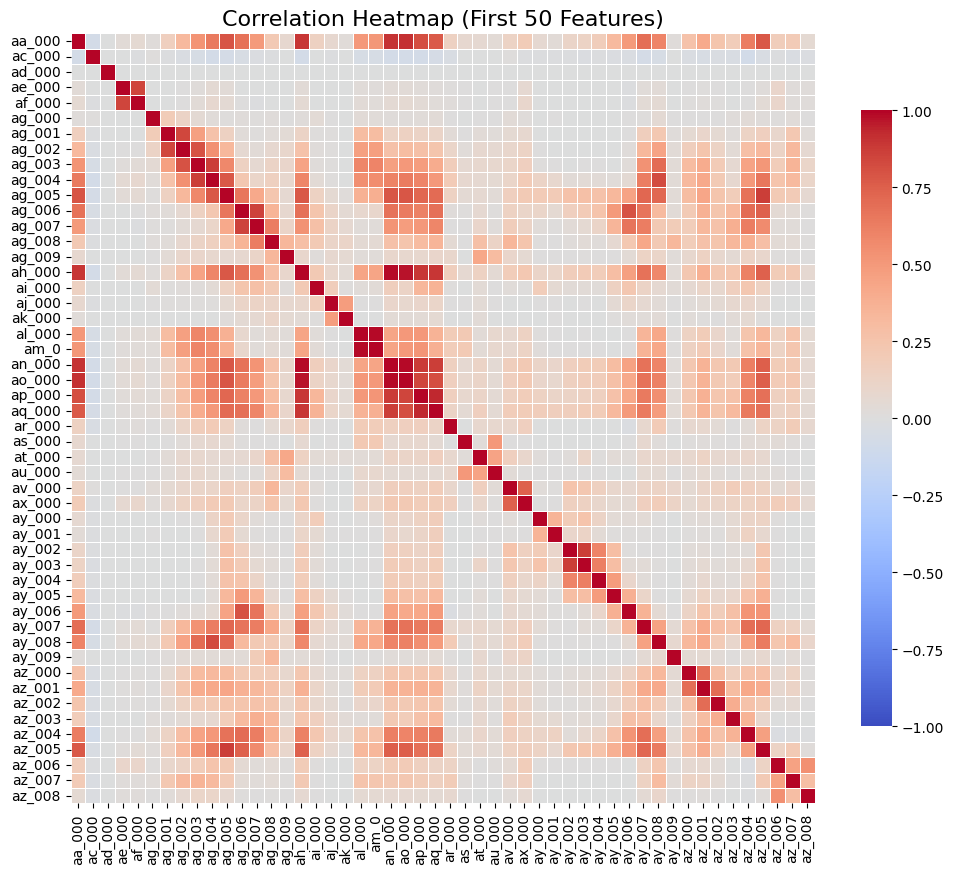

In [43]:
# --- 1. Impute Remaining NaNs with Median (Necessary for Correlation Matrix) ---
# Create the final, clean dataset for correlation
df_final = df.drop(columns=['class_encoded']).copy()

print("1. Imputing remaining NaN values with the Median...")
# Only apply imputation to numeric columns (which is all but 'class')
for col in df_final.columns:
    if col != 'class' and df_final[col].isnull().sum() > 0:
        # Calculate median only on the non-NaN values
        median_value = df_final[col].median()
        df_final[col].fillna(median_value, inplace=True)

print(f"   Total missing values after imputation: {df_final.isnull().sum().sum()}")
# Drop the target variable to analyze feature-to-feature correlation
features_only = df_final.drop(columns=['class']) 

# --- 2. Calculate Correlation Matrix and Identify Multicollinearity ---
# Calculate the Correlation Matrix (only for the first 50 features for visualization, as 164 is too big)
# We use the imputed (but not transformed) data for Pearson correlation
corr_matrix = features_only.iloc[:, :50].corr()

# Define the threshold for high correlation
high_corr_threshold = 0.95 

# Find features highly correlated with others (using the upper triangle of the matrix)
# This identifies one feature in a highly correlated pair that could potentially be dropped
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop_high_corr = [column for column in upper.columns if any(upper[column] > high_corr_threshold)]

print(f"\n2. Identifying High Correlation (r > {high_corr_threshold}) in first 50 features:")
print(f"Number of features with high multicollinearity found: {len(to_drop_high_corr)}")

# --- 3. Visualize the Correlation Matrix (Heatmap) ---
plt.figure(figsize=(12, 10))
# Use 'vmax' and 'vmin' to focus the color scale on the high correlation range
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5, 
            cbar_kws={'shrink': 0.8}, vmin=-1, vmax=1)
plt.title('Correlation Heatmap (First 50 Features)', fontsize=16)
plt.show()

The heatmap reveals significant patterns of multicollinearity, which is common in sensor data where multiple sensors may measure related processes or outputs over slightly different time windows.

**1. Highly Correlated Blocks (Bright Red/Blue):**

- **ag_000 to ag_009:** There is a distinct, large bright red block in this range. This indicates that sensor readings within the same prefix group (e.g., ag_ group) are highly positively correlated with each other. This is expected, as they likely measure the same physical phenomenon (e.g., pressure) but in different buckets or stages.

- **ay_000 to ay_009 and az_000 to az_009:** Similar strong positive correlations exist within these groups.

**2. Feature-Specific Redundancy (Example):**

- Features like **ag_000** show a high correlation not just with its **immediate neighbors (ag_001, ag_002)** but also potentially with **features from other groups** (the scattered red/blue squares).

**Implication for Modeling: Dimensionality Reduction**
The presence of widespread high correlation means that many of the features are redundant. Including all 164 features in a linear models (like Logistic Regression) would lead to:

- Instability: Small changes in the data can lead to large, unpredictable changes in the model's coefficients.

- Overfitting: The model learns noise associated with redundant features.

- Slower Training: Training time increases unnecessarily.

**Action Required:** We must use a technique like Principal Component Analysis (PCA) to transform this redundant set of 164 features into a smaller, independent set of components, or we can simply **rely on tree-based models** (like XGBoost or Random Forest) which **handle multicollinearity well** and often prefer the diversity of features.

## Checking if the Data is Balanced

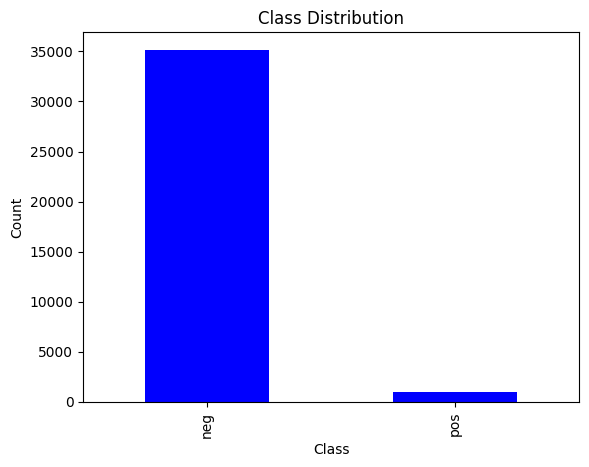

In [31]:
df['class'].value_counts().plot(kind='bar', color='blue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

**Report**

* The target classes are highly imbalanced
* Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the negative class (majority class) very large compared to that of the positive class (minority class)
* If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model.
Hence we should handle imbalanced data with certain methods.

**How to handle Imbalance Data ?**

Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.